# Homework 1. Exploratory Data Analysis

Due: Thursday, September 18, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW1.ipynb download=HW1.ipynb> Download this assignment</a>

---

## Introduction

In this homework we ask you three questions that we expect you to answer using data. For each question we ask you to complete a series of tasks that should help guide you through the data analysis. Complete these tasks and then write a short (100 words or less) answer to the question.

**Note**: We will briefly discuss this homework assignment on Thursday in class.

#### Data
For this assignment we will use two databases: 

1. The [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics) which contains the "complete batting and pitching statistics from 1871 to 2013, plus fielding statistics, standings, team stats, managerial records, post-season data, and more. For more details on the latest release, please [read the documentation](http://seanlahman.com/files/database/readme2012.txt)."

2. [Gapminder](http://www.gapminder.org) is a great resource that contains over [500 data sets](http://www.gapminder.org/data/) related to world indicators such as income, GDP and life expectancy. 


#### Purpose

In this assignment, you will learn how to: 

a. Load in CSV files from the web. 

b. Create functions in python. 

C. Create plots and summary statistics for exploratory data analysis such as histograms, boxplots and scatter plots. 


#### Useful libraries for this assignment 

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

---

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/stefan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 1

In Lecture 1, we showed a plot that provided evidence that the 2002 and 2003 Oakland A's, a team that used data science, had a competitive advantage. Since, others teams have started using data science as well. Use exploratory data analysis to determine if the competitive advantage has since disappeared. 

#### Problem 1(a) 
Load in [these CSV files](http://seanlahman.com/files/database/lahman-csv_2014-02-14.zip) from the [Sean Lahman's Baseball Database](http://seanlahman.com/baseball-archive/statistics). For this assignment, we will use the 'Salaries.csv' and 'Teams.csv' tables. Read these tables into a pandas `DataFrame` and show the head of each table. 

**Hint** Use the [requests](http://docs.python-requests.org/en/latest/), [StringIO](http://docs.python.org/2/library/stringio.html) and [zipfile](https://docs.python.org/2/library/zipfile.html) modules to get from the web.  

In [2]:
#your code here
#Offline version:
import zipfile
file_name = '/Users/stefan/Documents/Data Science/CS109/2014_data/lahman-csv_2014-02-14.zip'
with zipfile.ZipFile(file_name,'r') as zip_file:
    df_salaries = pd.read_csv(zip_file.open('Salaries.csv'))
    df_teams = pd.read_csv(zip_file.open('Teams.csv'))

#### Problem 1(b)

Summarize the Salaries DataFrame to show the total salaries for each team for each year. Show the head of the new summarized DataFrame. 

In [3]:
#your code here
df_salaries = df_salaries.groupby(['yearID','teamID'], as_index=False).sum()
df_salaries.head()

,yearID,teamID,salary
0,1985,ATL,14807000
1,1985,BAL,11560712
2,1985,BOS,10897560
3,1985,CAL,14427894
4,1985,CHA,9846178


#### Problem 1(c)

Merge the new summarized Salaries DataFrame and Teams DataFrame together to create a new DataFrame
showing wins and total salaries for each team for each year year. Show the head of the new merged DataFrame.

**Hint**: Merge the DataFrames using `teamID` and `yearID`.

In [4]:
#your code here
df_wins_salaries = pd.merge(df_teams[['yearID','teamID','W']],df_salaries)
df_wins_salaries.head()

,yearID,teamID,W,salary
0,1985,TOR,99,8812550
1,1985,NYA,97,14238204
2,1985,DET,84,10348143
3,1985,BAL,83,11560712
4,1985,BOS,81,10897560


#### Problem 1(d)

How would you graphically display the relationship between total wins and total salaries for a given year? What kind of plot would be best? Choose a plot to show this relationship and specifically annotate the Oakland baseball team on the on the plot. Show this plot across multiple years. In which years can you detect a competitive advantage from the Oakland baseball team of using data science? When did this end? 

**Hints**: Use a `for` loop to consider multiple years. Use the `teamID` (three letter representation of the team name) to save space on the plot.  

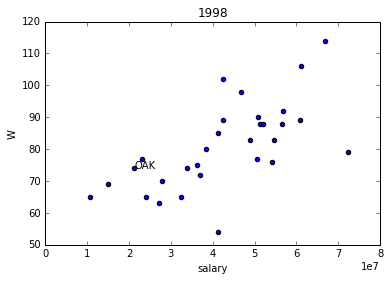

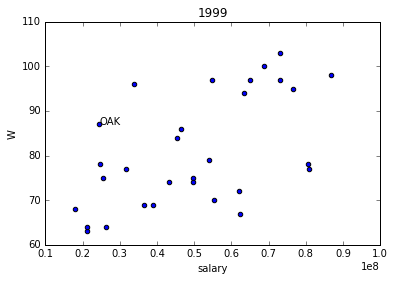

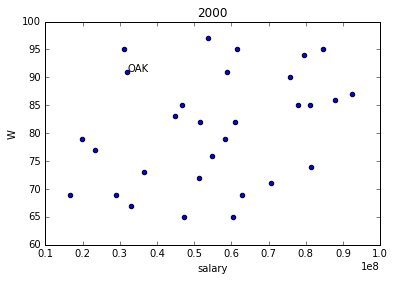

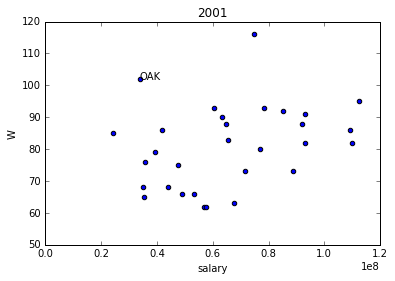

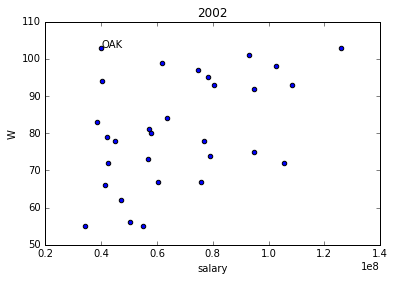

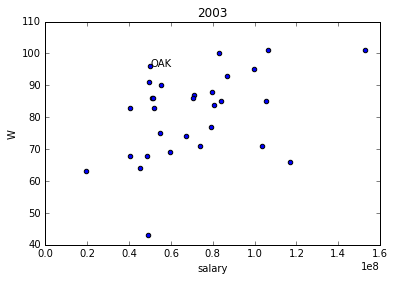

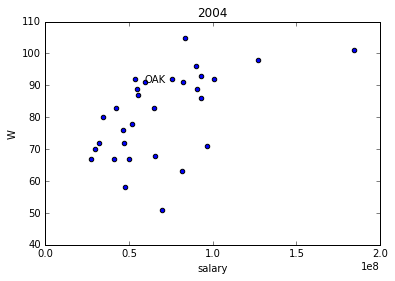

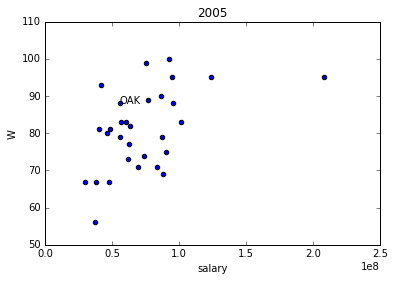

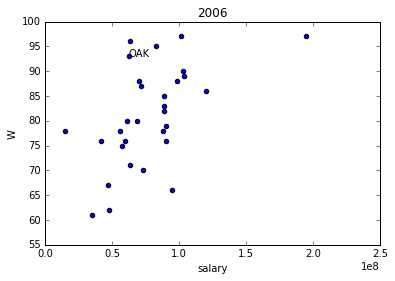

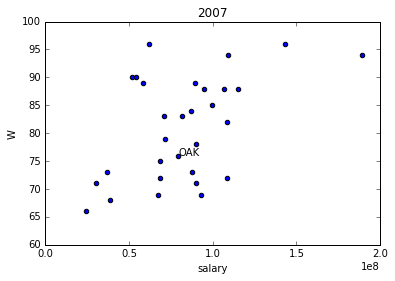

In [5]:
#your code here
for year in range(1998,2008):
    df_year_records = df_wins_salaries[df_wins_salaries['yearID']==year]
    df_year_records.plot(x='salary', y='W',kind = 'scatter',title= year)
    oak_records = df_year_records[df_year_records['teamID']=='OAK']
    oak_salary = oak_records['salary'].values[0]
    oak_wins = oak_records['W'].values[0]
    plt.annotate('OAK',(oak_salary, oak_wins))

#### Problem 1(e):

**For AC209 Students**: Fit a linear regression to the data from each year and obtain the residuals. Plot the residuals against time to detect patterns that support your answer in 1(d). 

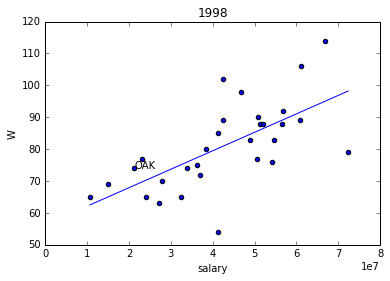

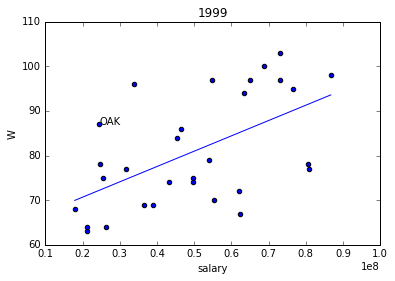

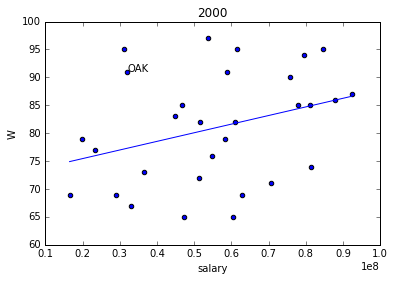

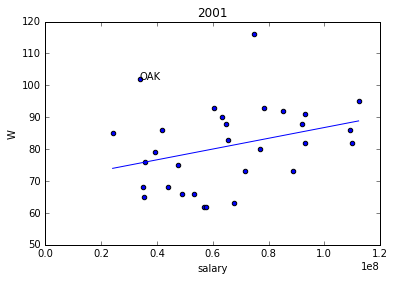

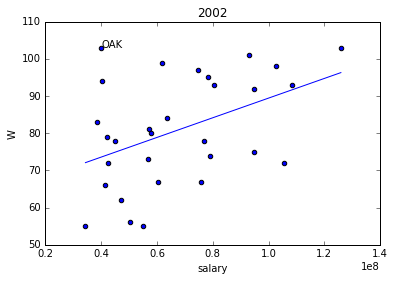

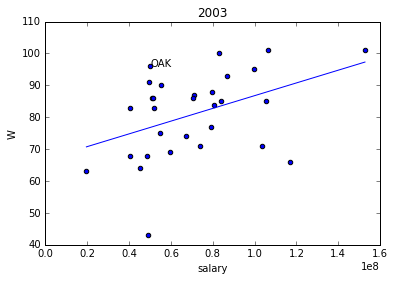

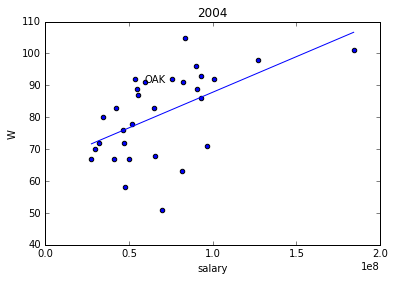

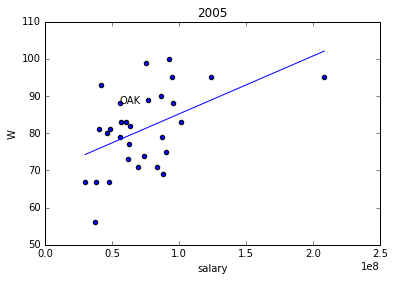

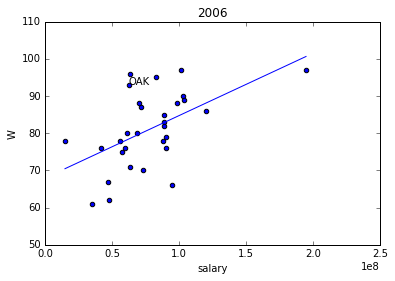

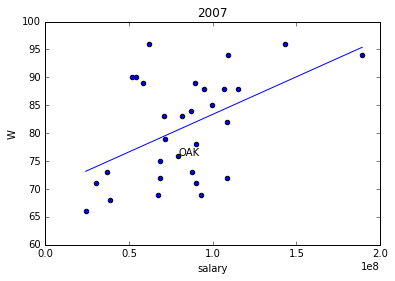

In [25]:
#your code here
#Linear Model: Wins = beta_0 + beta_1*salary
from numpy.linalg import inv

#Add column for residuals if not already present, initialize to zero
#Will fill it in as we go through the loop
df_wins_salaries['Residuals'] = 0

for year in range(1998,2008):
    df_year_records = df_wins_salaries[df_wins_salaries['yearID']==year]
    df_year_records.plot(x='salary', y='W',kind = 'scatter',title= year)
    oak_records = df_year_records[df_year_records['teamID']=='OAK']
    oak_salary = oak_records['salary'].values[0]
    oak_wins = oak_records['W'].values[0]
    plt.annotate('OAK',(oak_salary, oak_wins))
    
    #training features
    X = df_year_records['salary'].values
    #add bias
    X = np.append(np.ones(len(X)),X).reshape(2,len(X))
    #training output
    Y = df_year_records['W'].values
    #optimal fitting values
    beta_opt = inv(X.dot(X.T)).dot(X).dot(Y)
    #Add residual value to dataframe
    for team in df_year_records.teamID:
        condition = (df_wins_salaries.yearID==year) & (df_wins_salaries.teamID==team)
        line = df_wins_salaries[condition]
        df_wins_salaries.ix[line.index,'Residuals']= line['W'] - beta_opt[0]-beta_opt[1]*line['salary']
    
    #Plot best fit
    xmin = df_year_records['salary'].min()
    xmax = df_year_records['salary'].max()
    X_plot = np.linspace(xmin,xmax)
    X_plot = np.append(np.ones(len(X_plot)),X_plot).reshape(2,len(X_plot))
    plt.plot(np.linspace(xmin,xmax),beta_opt.dot(X_plot))

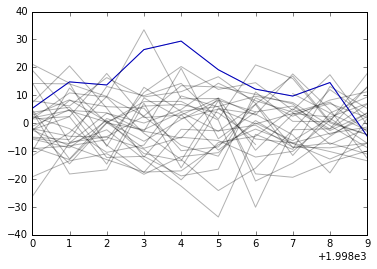

In [98]:
#Here plot the residuals as a function of year for each team for the same range of years:
df_res = df_wins_salaries[(df_wins_salaries.yearID > 1997) & (df_wins_salaries.yearID < 2008)]
for team in set(df_res.teamID):
    if team == "OAK":
        plt.plot(df_res[df_res.teamID==team].yearID,df_res[df_res.teamID==team].Residuals,alpha = 1,color= 'blue')
    plt.plot(df_res[df_res.teamID==team].yearID,df_res[df_res.teamID==team].Residuals,alpha = .3,color='black')

From this plot we see that Oakland had very high positive residuals for a few years in the early 2000s. this signals a competitive advantage.

## Discussion for Problem 1

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---


## Problem 2

Several media reports have demonstrated the income inequality has increased in the US during this last decade. Here we will look at global data. Use exploratory data analysis to determine if the gap between Africa/Latin America/Asia and Europe/NorthAmerica has increased, decreased or stayed the same during the last two decades. 

#### Problem 2(a)

Using the list of countries by continent from [World Atlas](http://www.worldatlas.com/cntycont.htm) data, load in the `countries.csv` file into a pandas DataFrame and name this data set as `countries`.  This data set can be found on Github in the 2014_data repository [here](https://github.com/cs109/2014_data/blob/master/countries.csv). 

In [311]:
#your code here
#Offline version:
file_name = '/Users/stefan/Documents/Data Science/CS109/2014_data/countries.csv'
countries = pd.read_csv(file_name)

Using the [data available on Gapminder](http://www.gapminder.org/data/), load in the [Income per person (GDP/capita, PPP$ inflation-adjusted)](https://spreadsheets.google.com/pub?key=phAwcNAVuyj1jiMAkmq1iMg&gid=0) as a pandas DataFrame and name this data set as `income`.

**Hint**: Consider using the pandas function `pandas.read_excel()` to read in the .xlsx file directly.

In [248]:
#your code here
#Offline version:
file_name = '/Users/stefan/Documents/Data Science/CS109/2014_data/indicator gapminder gdp_per_capita_ppp.xlsx'
income = pd.read_excel(file_name,index_col=0)

Transform the data set to have years as the rows and countries as the columns. Show the head of this data set when it is loaded. 

In [360]:
#your code here
income = income.T
income.head()

GDP per capita,Abkhazia,Afghanistan,Akrotiri and Dhekelia,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,North Yemen (former),South Yemen (former),Yemen,Yugoslavia,Zambia,Zimbabwe,Åland,South Sudan,nan,nan
1800,NaN,603.0,NaN,667.0,716.0,NaN,1197.0,618.0,NaN,757.0,...,NaN,NaN,877.0,NaN,663.0,869.0,NaN,507.0,NaN,NaN
1801,NaN,603.0,NaN,667.0,716.0,NaN,1199.0,620.0,NaN,757.0,...,NaN,NaN,879.0,NaN,665.0,870.0,NaN,507.0,NaN,NaN
1802,NaN,603.0,NaN,668.0,717.0,NaN,1201.0,623.0,NaN,757.0,...,NaN,NaN,882.0,NaN,667.0,871.0,NaN,507.0,NaN,NaN
1803,NaN,603.0,NaN,668.0,718.0,NaN,1204.0,626.0,NaN,757.0,...,NaN,NaN,884.0,NaN,668.0,872.0,NaN,507.0,NaN,NaN
1804,NaN,603.0,NaN,668.0,719.0,NaN,1206.0,628.0,NaN,757.0,...,NaN,NaN,887.0,NaN,670.0,873.0,NaN,508.0,NaN,NaN


#### Problem 2(b)

Graphically display the distribution of income per person across all countries in the world for any given year (e.g. 2000).  What kind of plot would be best? 

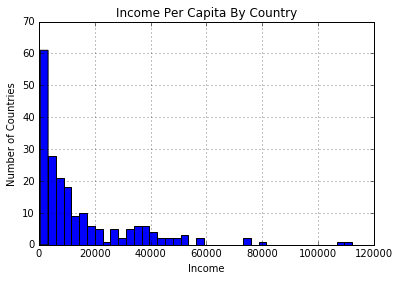

In [168]:
#your code here
income.ix[2000].hist(bins=40, figsize=(6, 4))
plt.title('Income Per Capita By Country')
plt.ylabel('Number of Countries')
plt.xlabel('Income')

#### Problem 2(c)

Write a function to merge the `countries` and `income` data sets for any given year. 

In [694]:
"""
Function
--------
mergeByYear

Return a merged DataFrame containing the income, 
country name and region for a given year. 

Parameters
----------
year : int
    The year of interest

Returns
-------
a DataFrame
   A pandas DataFrame with three columns titled 
   'Country', 'Region', and 'Income'. 

Example
-------
>>> mergeByYear(2010)
"""
#your code here
def mergeByYear(year):
    merged_df = countries.copy()
    merged_df['Income'] = 0 # initialize to zero
    for i in range(len(merged_df)):
        try:
            merged_df.ix[i,'Income'] = income.ix[year,merged_df.ix[i,'Country']]
        except KeyError:
            merged_df.ix[i,'Income'] = None #if data is missing we want to remove it later
    return merged_df.dropna() #drop those entries which are not in the income data
#BUG REOPORT:
#In an earlier version, the merged data frame was initialized to None in the Income column and then
#None was replaced by data from the income data frame. However, initializing to None caused the 'type'
#of the column to remain 'object' instead of 'float64' even after the data was inserted.  This led to
#problems down the line. It was better to initialize to 0, which is a number, in order to get the type right.



#Better option taken from solutions
#def mergeByYear(year):
#    data = pd.DataFrame(income.ix[year].values, columns = ['Income'])
#    data['Country'] = income.columns
#    joined = pd.merge(data, countries, how="inner", on=['Country'])
    #joined.Income = np.round(joined.Income, 2)
#    return joined

mergeByYear(2010).head()

,Country,Region,Income
0,Algeria,AFRICA,12494.0
1,Angola,AFRICA,7047.0
2,Benin,AFRICA,1637.0
3,Botswana,AFRICA,13642.0
5,Burundi,AFRICA,725.0


#### Problem 2(d) 

Use exploratory data analysis tools such as histograms and boxplots to explore the distribution of the income per person by region data set from 2(c) for a given year. Describe how these change through the recent years?

**Hint**: Use a `for` loop to consider multiple years.  

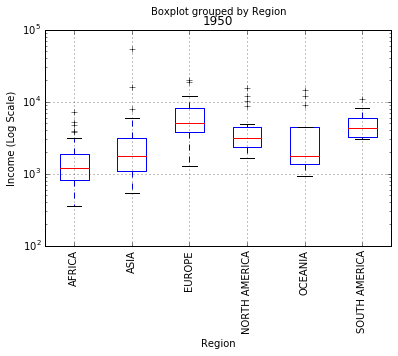

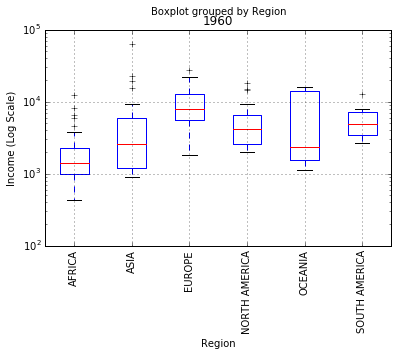

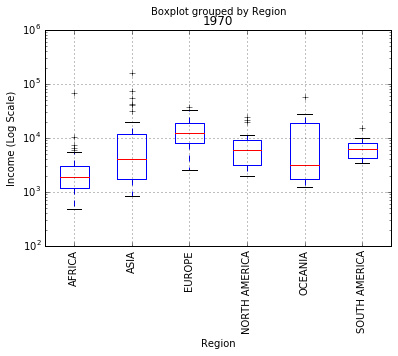

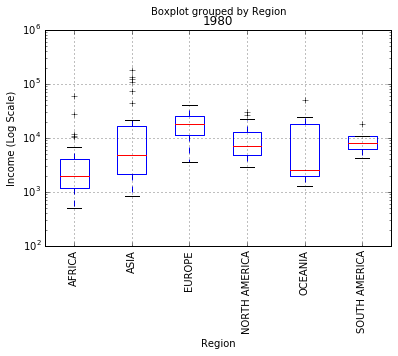

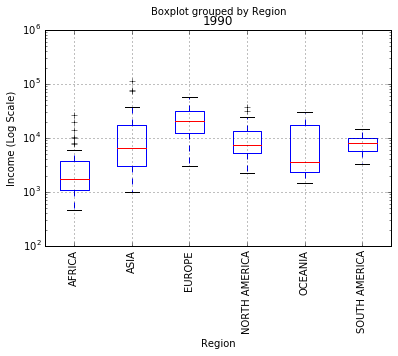

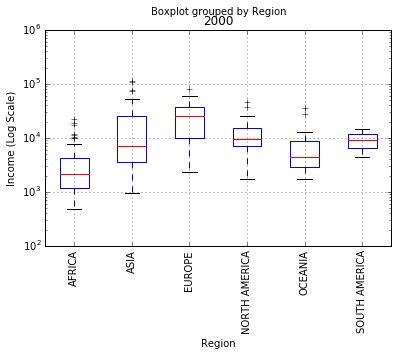

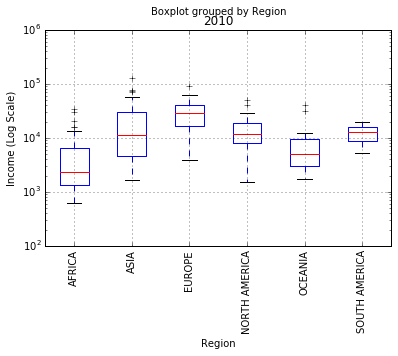

In [695]:
#your code here
for year in range(1950,2015,10):
    year_data = mergeByYear(year)
    year_data.boxplot('Income', by='Region',rot = 90)
    plt.title(year)
    plt.ylabel('Income (Log Scale)')
    plt.yscale('log')

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---

## Problem 3

In general, if group A has larger values than group B on average, does this mean the largest values are from group A? Discuss after completing each of the problems below. 

#### Problem 3(a)

Assume you have two list of numbers, X and Y, with distribution approximately normal. X and Y have standard deviation equal to 1, but the average of X is different from the average of Y.  If the difference in the average of X and the average of Y is larger than 0, how does the proportion of X > a compare to the proportion of Y > a? 

Write a function that analytically calculates the ratio of these two proportions: Pr(X > a)/Pr(Y > a) as function of the difference in the average of X and the average of Y. 

**Hint**: Use the `scipy.stats` module for useful functions related to a normal random variable such as the probability density function, cumulative distribution function and survival function. 

**Update**: Assume Y is normally distributed with mean equal to 0. 

Show the curve for different values of a (a = 2,3,4 and 5).

In [696]:
"""
Function
--------
ratioNormals

Return ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a) as function of 
    the difference in the average of X 
    and the average of Y. 

Parameters
----------
diff : difference in the average of X 
    and the average of Y. 
a : cutoff value

Returns
-------
Returns ratio of these two proportions: 
    Pr(X > a)/Pr(Y > a)
    
Example
-------
>>> ratioNormals(diff = 1, a = 2)
"""
#your code here
import scipy.stats as stats

def ratioNormals(diff, a):
    return (1-stats.norm.cdf(a-diff))/(1-stats.norm.cdf(a))

ratioNormals(diff = 1, a = 2)

6.9738168680887558

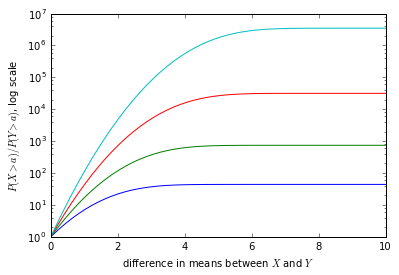

In [596]:
#your code here
for a in [2,3,4,5]:
    x = np.linspace(0,10)
    y = ratioNormals(x,a)
    plt.plot(x,y)
plt.yscale('log')
plt.ylabel('$P(X>a)/P(Y>a)$, log scale')
plt.xlabel('difference in means between $X$ and $Y$')

#### Problem 3(b)

Now consider the distribution of income per person from two regions: Asia and South America. Estimate the average income per person across the countries in those two regions. Which region has the larger average of income per person across the countries in that region? 

**Update**: Use the year 2012. 

In [697]:
#your code here
year_data = mergeByYear(2012)
asia_data = year_data[year_data['Region']=='ASIA'].drop('Region',axis=1)
sa_data = year_data[year_data['Region']=='SOUTH AMERICA'].drop('Region',axis=1)
print 'Average income in Asia: %s' %np.round(asia_data.Income.mean(),2)
print 'Average income in South America: %s' %np.round(sa_data.Income.mean(),2)

Average income in Asia: 23500.43
Average income in South America: 13015.75


#### Problem 3(c) 

Calculate the proportion of countries with income per person that is greater than 10,000 dollars. Which region has a larger proportion of countries with income per person greater than 10,000 dollars? If the answer here is different from the answer in 3(b), explain why in light of your answer to 3(a).

**Update**: Use the year 2012. 

In [698]:
#your code here
asia_threshold = asia_data['Income'].map(lambda x: 1 if x>10000 else 0)
sa_threshold = sa_data['Income'].map(lambda x: 1 if x>10000 else 0)
print 'Fraction of countries with income >$10k in Asia: %s' %np.round(asia_threshold.mean(),2)
print 'Fraction of countries with income >$10k in South America: %s' %np.round(sa_threshold.mean(),2)

Fraction of countries with income >$10k in Asia: 0.57
Fraction of countries with income >$10k in South America: 0.75


Even though Asia has the higher average income, fewer of its countries have income greater than the $10,000 cutoff. So the shapes of the distributions must be different.

#### Problem 3(d)

**For AC209 Students**: Re-run this analysis in Problem 3 but compute the average income per person for each region, instead of the average of the reported incomes per person across countries in the region. Why are these two different? Hint: use this [data set](https://spreadsheets.google.com/pub?key=phAwcNAVuyj0XOoBL_n5tAQ&gid=0). 

In [707]:
#your code here
#Offline version:
file_name = '/Users/stefan/Documents/Data Science/CS109/2014_data/indicator gapminder population.xlsx'
population = pd.read_excel(file_name,index_col=0).T #population data, row index = year, columns = countries

#Function to add Population column to year_data defined above
def addPop(old_data, year):
    new_data = pd.DataFrame(population.ix[year].values, columns=['Population'])
    new_data['Country'] = population.columns
    new_data = pd.merge(new_data, old_data, on='Country')
    return new_data

#Execute function. NOTE: We are being SLOPPY about the YEAR! Should be more systematic.
income_pop_data = addPop(year_data,2012)
#Add Column for the total income in each country
income_pop_data['Total Income'] = income_pop_data['Income']*income_pop_data['Population']
#Add a column that contains the population of the country if the average income is more than 10,000 and 0 otherwise
income_pop_data['P'] = income_pop_data['Income'].map(lambda x: 1 if x>10000 else 0)*income_pop_data['Population']
#Sum over all countries in the region to get total pupulation and total income for each region
income_pop_by_region = income_pop_data.drop('Income',axis=1).groupby('Region').sum()
#Divide Income in each region by population to get income per person in that region
income_pop_by_region['Income per Person'] = income_pop_by_region['Total Income']/income_pop_by_region['Population']
#Divide 'P' in each region by population to fraction of population with income greater than 10,000
income_pop_by_region['P'] = income_pop_by_region['P']/income_pop_by_region['Population']
#Include Income average as computed in the previous section. For comparison purposes.
income_pop_by_region['Income (Old Method)'] = income_pop_data.groupby('Region').mean().Income
np.round(income_pop_by_region,2)

,Population,Total Income,P,Income per Person,Income (Old Method)
Region,,,,,
AFRICA,9.851763e+08,4.802571e+12,0.20,4874.83,5601.22
ASIA,4.067145e+09,3.955187e+13,0.46,9724.72,23500.43
EUROPE,6.034930e+08,1.888878e+13,0.90,31299.09,30492.72
NORTH AMERICA,5.523386e+08,2.013800e+13,0.91,36459.52,16036.65
OCEANIA,3.666659e+07,1.148115e+12,0.75,31312.28,10481.15
SOUTH AMERICA,4.055004e+08,5.906046e+12,0.96,14564.84,13015.75


Here we see that the total income per person is much less than when we average by country. The disparity is smaller for South America. This is caused by Asia having many poor people in a single country, and fewer rich people in another country. Then when averaging the per-person income over the countries, the few rich count for more and raise the average. We can also see this in the probabilities for making more than $10,000. Shifting to per-person made the probability in Asia go up and the probability is South America go down.

## Discussion for Problem 3

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

---
